In [273]:
import numpy as np

from sklearn import datasets
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

%run Lab2_NN.ipynb

In [274]:
def load_iris():
  iris = datasets.load_iris()
  x = iris.data.astype(np.float32)
  y = iris.target

  y = to_categorical(y, np.max(y)+1).astype(np.float32)

  # need to do conditioning on the dataset

  x_train, x_test, y_train, y_test = train_test_split(x, y)
    
  x_train = normalize(x_train, norm='max', axis=0)
  x_test = normalize(x_test, norm='max', axis=0)

  return (x_train, y_train), (x_test, y_test)

In [284]:
import matplotlib.pyplot as plt

%matplotlib inline 

def plot_loss(losses, test_loss, epochs):
  fig, ax = plt.subplots()
  time = np.arange(0, epochs, 1)
  ax.plot(time, losses)

  # test loss
  y = test_loss
  plt.axhline(y=y, color="orange")
  text = 'test loss: ' + str(np.around(y, decimals=3))
  plt.annotate(text, xy=(2, y), xytext=(3, y*1.1),
    arrowprops=dict(facecolor='black', shrink=0.05),
  )

  ax.set(xlabel='iteration', ylabel='loss',
       title='Loss over time')
  plt.show()
    
def plot_accuracy(accuracies, test_accuracy, epochs):
  fig, ax = plt.subplots()
  time = np.arange(0, epochs, 1)
  ax.plot(time, accuracies)

  # test accuracy
  y = test_accuracy
  plt.axhline(y=y, color="orange")
  text = 'test accuracy: ' + str(np.around(y, decimals=3))
  plt.annotate(text, xy=(2, y), xytext=(3, y*0.92),
    arrowprops=dict(facecolor='black', shrink=0.05),
  )

  ax.set(xlabel='iteration', ylabel='accuracy',
       title='Accuracy over time')
  plt.show()


In [297]:
def main():
  (x_train, y_train), (x_test, y_test) = load_iris()

  # example of network. try your own to get higher accuracy
  # plot training and test loss over time in jupyter notebook
  # plot training and test accuracy over time in jupyter notebook 

  outputs = ["relu", "relu", "sigmoid"]
  shapes = [x_train.shape[1], 30, 10, y_train.shape[1]]

  train_losses = []
  train_accuracies = []
    
  # which alpha should you use?
  alpha = 0.03
  model = initialize_weights(shapes, outputs)
  labels = np.argmax(y_train, axis=1)
  epochs = 100

  # Training
  for i in range(epochs):
    fwd_results = forward(x_train, model)
    loss, dweights = backward(y_train, fwd_results, model, "binary_crossentropy")
    update(model, dweights, alpha)
    
    prediction = predict(x_train, model)
    prediction = np.argmax(prediction, axis=1)
    
    accuracy = np.divide(np.sum(prediction==labels), labels.shape[0])
    accuracy = np.around(accuracy, decimals=3)
    
    train_accuracies.append(accuracy)
    train_losses.append(loss)
    
  # Test Set
  test_results = forward(x_test, model)
  test_loss, _ = backward(y_test, test_results, model, "binary_crossentropy")
  prediction = test_results[-1]["y"]
  prediction = np.argmax(prediction, axis=1)
    
  test_labels = np.argmax(y_test, axis=1)
  test_accuracy = np.divide(np.sum(prediction==test_labels), test_labels.shape[0])
  test_accuracy = np.around(test_accuracy, decimals=3)

  # Plot
  plot_loss(train_losses, test_loss, epochs)
  plot_accuracy(train_accuracies, test_accuracy, epochs)

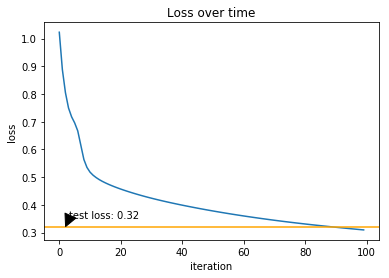

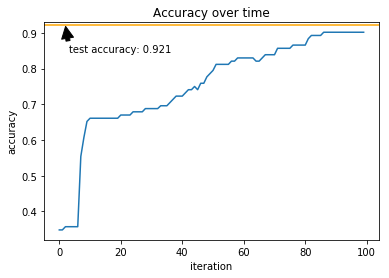

In [298]:
if __name__ == "__main__":
  main()